In [1]:
path = 'C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice'

In [2]:
# ! ls -l ./drive/My\ Drive/reference/Source/news_subject_classification/

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [2]:
import codecs
positive = []
negative = []
posneg = []
#print(path+"positive_words_self.txt")
file_path1 = path+"/positive_words_self.txt"
#print(file_path)
pos = codecs.open(file_path1, 'rb', encoding='UTF-8') 
while True:
  line = pos.readline()
  line = line.replace('\n', '')
  positive.append(line)
  posneg.append(line)
  if not line: break 
pos.close()
file_path2 = path+"/negative_words_self.txt"

neg = codecs.open(file_path2, 'rb', encoding='UTF-8')

while True:
  line = neg.readline()
  line = line.replace('\n', '')
  negative.append(line)
  posneg.append(line)
  if not line: break
neg.close()

In [3]:
del posneg[188]
del posneg[295]

In [ ]:
!ls -l ./drive/My\ Drive/Source/news_subject_classification/positive_words_self.txt


-rw------- 1 root root 358 Oct  8 12:35 './drive/My Drive/Source/news_subject_classification/positive_words_self.txt'


In [4]:
import pandas as pd

In [14]:
pip install konlpy

  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.1
    Uninstalling beautifulsoup4-4.9.1:
      Successfully uninstalled beautifulsoup4-4.9.1
Note: you may need to restart the kernel to use updated packages.


In [36]:
test_data_cj = pd.read_csv("C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice/SK하이닉스_df.csv")

stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

import konlpy
from konlpy.tag import Okt

okt = Okt()
#test_data_cj
X_test = []
test_data_cj = test_data_cj.dropna()

for sentence in test_data_cj['Title']:
  #print(sentence)
  #break;
    if sentence is not None:
        temp_X = []
        temp_X = okt.morphs(sentence, stem=True) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)

words = []
for tokens in X_test:
    for token in tokens:  
        words.append(token)


#X_test

In [37]:
from collections import Counter

count = Counter(words)

tag_count = []
tags = []

for n, c in count.most_common(500):
  dics = {'tag': n, 'count': c}

  if len(dics['tag']) >= 2 and len(tags) <= 250:
    tag_count.append(dics)
    tags.append(dics['tag'])

for tag in tag_count:
  print(" {:<14}".format(tag['tag']), end='\t')
  print("{}".format(tag['count']))

 코스피           	3121
 SK            	2436
 하이닉스          	2064
 반도체           	1023
 기관            	907
 삼성            	747
 외국인           	746
 상승            	566
 전자            	566
 하락            	525
 보합            	460
 실적            	424
 외인            	421
 팔자            	414
 회복            	403
 특징            	394
 투자            	384
 마감            	375
 매도            	354
 종목            	349
 매수            	346
 만에            	344
 사자            	323
 증시            	313
 '…            	312
 코스닥           	292
 컨콜            	292
 개인            	286
 外人            	284
 도시바           	276
 기업            	273
 규모            	268
 공급            	265
 영업            	263
 계약            	249
 종합            	241
 ...           	213
 ]"            	211
 연속            	209
 낸드            	200
 장비            	199
 동반            	198
 거래            	196
 클릭            	195
 반등            	189
 초반            	186
 그룹            	182
 최태원           	182
 최대            	181
 …"            	

In [10]:
sk_hy=pd.read_csv('C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice/SK하이닉스_df.csv')

In [49]:
h_movis=pd.read_csv('C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice/현대모비스_df.csv')

In [51]:
kia_car=pd.read_csv('C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice/기아차_df.csv')

In [56]:
skhy_titles=sk_hy['Title']

In [57]:
h_titles=h_movis['Title']

In [58]:
kia_titles=kia_car['Title']

In [54]:
kia_titles

0           전기차-충전기 제조사와 함께하는 '상호운용성 테스티벌'
1          "정부, 저공해차 안 만드는 대기업에 패널티 강화 추진"
2        '시스템반도체 팹리스' 후속조치 본격화…현장과 소통행보 시작
3            외국인, 보름간 韓 주식 2.4兆 매수…반도체가 절반
4           與 "한국당의 '박영선 흠집내기' 도 넘어…강력 대응"
                       ...                
9809            쏘렌토 부식 무상 수리…지역 서비스센터서도 가능
9810     기아자동차 채용 박람회, 서울·광주·대구서…취업준비 요령은?
9811    임팔라, 세계서 가장많이 팔린차 톱10…그랜저·K7과 대결할까
9812           오츠카 제약, 2014 인천 AG 공식 후원 계약
9813                KIA타이거즈, "러브펀드 전달식" 성료
Name: Title, Length: 9814, dtype: object

In [59]:
skhy_titles=skhy_titles.dropna()
h_titles=h_titles.dropna()
kia_titles=kia_titles.dropna()

In [15]:
sk_title.to_csv('./sk_title.csv')


In [16]:
titles[0].find(posneg[1])

-1

In [1]:
positive

NameError: name 'positive' is not defined

In [60]:
skhy_titles

0             올해 반도체 수출 3년 만에 최저, 수출 비중 17%로 하락
1                개미는 올해도 슬프다…순매수 톱10, 상승 종목 '0'
2                개미는 올해도 슬프다…순매수 톱10, 상승 종목 '0'
3                한라, 용인역삼 지역주택조합 공사 수주…2109억 규모
4              올해 증시 폐장일 코스피 2200선 혼조...코스닥 강보합
                         ...                   
8425           코스피 1.2% 약세, 1940선 등락…삼성電 128.9만
8426    "환율·실적·中 우려" 새해 첫날 코스피 2% 급락…1960선 '털썩'
8427                      엔底에도 달린 현대차 3인방, 올해는?
8428       "새해, 하행선 급행 電·車?"…코스피 장 중 1960선 '털썩'
8429                    SKT "자승자강 의지로 경쟁서 이길 것"
Name: Title, Length: 8430, dtype: object

In [103]:
import requests
import re
import pandas as pd

label = []

my_title_dic = {"title":[], "label":label}

j=0
for title in sk_tele_for_test:
    my_title_dic['title'].append(title)
    for i in range(len(posneg)):
        posflag = False 
        negflag = False 
        if i < (len(positive)-1): 
            # print(title_data.find(posneg[i])) 
            if title.find(posneg[i]) != -1:
                posflag = True
                print(i, "positive?","테스트 : ",title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title) 
                break
        if i > (len(positive)-2): 
            if title.find(posneg[i]) != -1: 
                negflag = True 
                print(i, "negative?","테스트 : ",title.find(posneg[i]),"비교단어 : ", posneg[i], "인덱스 : ", i, title) 
                break
    if posflag == True:
        label.append(1)
        # print("positive", j) 
    elif negflag == True:
        label.append(-1)
    #print("negative", j) 
    elif negflag == False and posflag == False:
        label.append(0)
        # print("objective", j) 
    j+=1
my_title_dic['label'] = label 
my_title_df = pd.DataFrame(my_title_dic)

29 positive? 테스트 :  38 비교단어 :  체결 인덱스 :  29 한난, 성남시·SK텔레콤과 '기술개발 생태계 조성을 위한 업무협약' 체결
74 positive? 테스트 :  14 비교단어 :  협력 인덱스 :  74 한-아세안, 개발원조-문화협력-벤처투자 모색
62 positive? 테스트 :  25 비교단어 :  개최 인덱스 :  62 韓美, 아세안서 '反화웨이' 5G통신 워크숍 개최
164 positive? 테스트 :  22 비교단어 :  기대 인덱스 :  164 오늘부터 모든 병사 개인 휴대폰 사용…'기대 속 우려도'
277 negative? 테스트 :  26 비교단어 :  의혹 인덱스 :  277 '딸·조카 KT 특혜채용' 김성태 "정치공작" 의혹 부인
142 positive? 테스트 :  12 비교단어 :  혁신 인덱스 :  142 文대통령 "CES서 '혁신 한국' 저력 증명…ICT 세계시장 선도"
79 positive? 테스트 :  6 비교단어 :  최초 인덱스 :  79 남한은 세계최초 5G..북한은 체제유지 3G
36 positive? 테스트 :  11 비교단어 :  최고 인덱스 :  36 남북정상회담 시간…'최고 보안 사항' 이유는?
139 positive? 테스트 :  29 비교단어 :  할인 인덱스 :  139 [2017국감]"SKT 가입기간 계산시 월 제외…요금할인 낮춰"
237 negative? 테스트 :  30 비교단어 :  우려 인덱스 :  237 [2017국감]삼성전자 공정위 618회나 방문…"유착 우려"
64 positive? 테스트 :  25 비교단어 :  개선 인덱스 :  64 '출산 지도' 홍역 행자부, '여혐' 이미지 개선 나섰나?
170 positive? 테스트 :  24 비교단어 :  성공 인덱스 :  170 김명희 SK텔레콤 본부장, 정부 헤드헌팅 여성공무원 1호
230 negative? 테스트 :  19 비교단어 :  게이트 인덱스 :  230 [潘의 귀환]반기문 둘러싼 각종 '게이트'…막올린 검증 무

32 positive? 테스트 :  3 비교단어 :  기부 인덱스 :  32 '소액기부의 힘'…SK 임직원, 지난해 총 56억 기부
150 positive? 테스트 :  31 비교단어 :  계약 인덱스 :  150 서화정보통신, SKT와 3억2344만원 규모 중계기 공급계약
150 positive? 테스트 :  30 비교단어 :  계약 인덱스 :  150 지에스인스트루, 36억원 규모 SK텔레콤 중계기 납품 계약
56 positive? 테스트 :  12 비교단어 :  성장 인덱스 :  56 안충영 동반위원장 "저성장·양극화 해법은 동반성장"
17 positive? 테스트 :  33 비교단어 :  오픈 인덱스 :  17 삼성카드, 반려동물을 위한 토탈케어 플랫폼 '삼성카드 펫' 오픈
107 positive? 테스트 :  7 비교단어 :  선정 인덱스 :  107 [인터넷은행 선정] 한화생명 "온라인 방카 추진"…'K뱅크' 인터넷전문은행 참여
107 positive? 테스트 :  7 비교단어 :  선정 인덱스 :  107 [인터넷은행 선정]카카오은행·K뱅크 예비인가 선정 일지
176 positive? 테스트 :  24 비교단어 :  합병 인덱스 :  176 유비벨록스 자회사 라임아이, 디오인터랙티브 합병안 주주총회 승인
0 positive? 테스트 :  26 비교단어 :  MOU 인덱스 :  0 대전창조센터·SKT, 차이나유니콤과 벤처 육성 MOU
139 positive? 테스트 :  23 비교단어 :  할인 인덱스 :  139 망고식스, 이달부터 T멤버십 고객 10% 할인 제공
79 positive? 테스트 :  26 비교단어 :  최초 인덱스 :  79 금감원-SKT, 보이스피싱 척결 위한 민관협약 최초로 맺어
15 positive? 테스트 :  34 비교단어 :  출시 인덱스 :  15 11번가, EXID 하니의 ‘레노버 패블릿’ 30만원대 단독 출시
114 positive? 테스트 :  17 비교단어 :  본격 인덱스 :  114 SK, 청년창업 지원 프로

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 

68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :

182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :

60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  1

176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 :  합병 인덱스 :  176 [SKT컨콜]"내년 1분기 이내 티브로드 합병 완료 예상"
154 positive? 테스트 :  29 비교단어 :  시너지 인덱스 :  154 [SKT컨콜]"카카오 IT자산, 유료플랫폼과 결합해 시너지낼것"
60 positive? 테스트 :  22 비교단어 :  최대 인덱스 :  60 양대 포털, 풍성한 3분기…나란히 분기 최대 매출
62 positive? 테스트 :  29 비교단어 :  개최 인덱스 :  62 "AI로 일상을 바꾸자"…'AI PLUS 2019' 개최
182 positive? 테스트 :  19 비교단어 :  효자 인덱스 :  182 "5G 투자 발목...미디어·보안 효자"...SKT, 영업익 0.7%↓(종합)
62 positive? 테스트 :  35 비교단어 :  개최 인덱스 :  62 SKT, 장애청소년 ICT 경진대회…1999년부터 20년 연속 개최
178 positive? 테스트 :  32 비교단어 :  선도 인덱스 :  178 SKT-광주시, 지능형전력망으로 ‘에너지 프로슈머’ 시대 선도
15 positive? 테스트 :  37 비교단어 :  출시 인덱스 :  15 "헌혈하고 폰으로 건강 관리" SKT-대한적십자사, ‘레드커넥트’ 출시
181 positive? 테스트 :  27 비교단어 :  독점 인덱스 :  181 웨이브, 야구 월드컵 'WBSC 프리미어 12' 독점 중계
68 positive? 테스트 :  11 비교단어 :  박차 인덱스 :  68 "금융, 통신 혁신 박차" SK텔레콤·KEB하나銀·SK텔링크 '맞손'
176 positive? 테스트 :  23 비교단어 

27 positive? 테스트 :  11 비교단어 :  진출 인덱스 :  27 삼본전자, e스포츠 진출 'SKT·컴캐스트와 맞손'
172 positive? 테스트 :  13 비교단어 :  효과 인덱스 :  172 인크로스, 디지털 광고 효과 예측 솔루션 '아이리치보드 2.0' 론칭
201 negative? 테스트 :  23 비교단어 :  하락 인덱스 :  201 외국인·기관 쌍끌이 매도에 코스피·코스닥 하락 마감
13 positive? 테스트 :  27 비교단어 :  유치 인덱스 :  13 토종 앱마켓 플랫폼 '원스토어' 1000억 자본 유치
46 positive? 테스트 :  24 비교단어 :  확대 인덱스 :  46 [클릭 e종목]"인크로스, SKT와 시너지 확대"
52 positive? 테스트 :  13 비교단어 :  상승 인덱스 :  52 코스피, 외인 순매수에 상승…코스닥은 610선 회복
52 positive? 테스트 :  19 비교단어 :  상승 인덱스 :  52 코스피, 미·중 무역협상 기대감에 상승 출발… 코스닥 600선 회복 도전
52 positive? 테스트 :  24 비교단어 :  상승 인덱스 :  52 코스피 1940선 회복 앞둬…코스닥도 동반 상승
51 positive? 테스트 :  42 비교단어 :  강세 인덱스 :  51 [특징주]우리넷, 5G 인테나·양자암호 등 차세대 광통신 수혜 이제 시작 '강세'
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]“SK, 주가 조정 불구 지주사 중 가장 안정적 업종 포트폴리오 보유”
263 negative? 테스트 :  21 비교단어 :  사고 인덱스 :  263 외국인, 3주 연속 '팔자'…삼성전기 사고 삼성전자 팔고
201 negative? 테스트 :  8 비교단어 :  하락 인덱스 :  201 코스피·코스닥 하락 마감…미국발 'R의 공포' 영향(종합)
46 positive? 테스트 :  24 비교단어 :  확대 인덱스 :  46 [특징주]에이치엔티·

149 positive? 테스트 :  11 비교단어 :  완화 인덱스 :  149 코스피 美통화리스크 완화 외인매수 '2300' 바싹
52 positive? 테스트 :  35 비교단어 :  상승 인덱스 :  52 韓증시, 美연준 점진금리인상 안도 외인매수…2300·800 동반상승
46 positive? 테스트 :  24 비교단어 :  확대 인덱스 :  46 [클릭 e종목]"SM C&C, 콘텐츠 투자 확대 수혜 기대"
4 positive? 테스트 :  32 비교단어 :  돌파 인덱스 :  4 코스피, 1년 만에 6거래일 연속 상승 마감… 2290선 돌파
52 positive? 테스트 :  20 비교단어 :  상승 인덱스 :  52 코스피, 외인 '매수'에 5일 연속 상승마감…미중 무역협상 '촉각'
201 negative? 테스트 :  14 비교단어 :  하락 인덱스 :  201 코스피, 기관 '팔자'에 하락전환
52 positive? 테스트 :  0 비교단어 :  상승 인덱스 :  52 상승폭 키우는 코스피…미중 무역갈등 완화 기대↑
124 positive? 테스트 :  23 비교단어 :  회복 인덱스 :  124 코스피, 미·중 협상 기대감에 2270선 회복…외인 1000억 매수
29 positive? 테스트 :  28 비교단어 :  체결 인덱스 :  29 CS, SK텔레콤과 28억 규모 광중계기 공급계약 체결
172 positive? 테스트 :  6 비교단어 :  효과 인덱스 :  172 BTS 경제효과 리스타트…韓 경기 '봄날' 고민보다 GO!
124 positive? 테스트 :  23 비교단어 :  회복 인덱스 :  124 코스피, 미·중 무역협상 기대에 2250 회복…개인 '매수'
51 positive? 테스트 :  38 비교단어 :  강세 인덱스 :  51 [특징주] 마크로젠, SK텔레콤과 AI 유전체 분석솔루션 개발 협력…강세
52 positive? 테스트 :  32 비교단어 :  상승 인덱스 :  52 미·중 무역협상 재개 기대감…코스피·코스닥 장

57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]"통신업, 저평가 국면 진입"
36 positive? 테스트 :  22 비교단어 :  최고 인덱스 :  36 '새역사' 코스피, 하루만에 종가 기준 최고가 경신
139 positive? 테스트 :  7 비교단어 :  할인 인덱스 :  139 미래부, 약정할인율로 가계통신비 잡는다
36 positive? 테스트 :  31 비교단어 :  최고 인덱스 :  36 [코스피 종가 2400]'외국인 러브콜' 코스피, 사상 최고치 '2409.49'
4 positive? 테스트 :  25 비교단어 :  돌파 인덱스 :  4 코스피, 외국인·기관 매수 확대에 2420선 돌파
36 positive? 테스트 :  20 비교단어 :  최고 인덱스 :  36 코스피, 외인 '사자'에 종가 사상 최고치 마감
52 positive? 테스트 :  19 비교단어 :  상승 인덱스 :  52 코스피, 기관 매수세에 이틀 연속 상승 출발
64 positive? 테스트 :  23 비교단어 :  개선 인덱스 :  64 [새 정부 '新기업' 만들기]기업지배구조 개선 '3 WIN' 효과
57 positive? 테스트 :  1 비교단어 :  클릭 인덱스 :  57 [클릭 e종목]"SK텔레콤, SKB 홈앤서비스 설립 긍정적"
164 positive? 테스트 :  29 비교단어 :  기대 인덱스 :  164 코스피, 2380선 강보합 마감…北리스크 VS 실적 기대감
198 negative? 테스트 :  6 비교단어 :  리스크 인덱스 :  198 코스피, 北리스크에 약보합…2370선 후퇴
270 negative? 테스트 :  22 비교단어 :  후퇴 인덱스 :  270 코스피, 北 중대보도 예고에 2370선 후퇴
201 negative? 테스트 :  29 비교단어 :  하락 인덱스 :  201 코스피, 2390선서 숨고르기…외국인·기관 매도세에 하락 마감
36 positive? 테스트 :  5 비교단어 :  최고 인

237 negative? 테스트 :  10 비교단어 :  우려 인덱스 :  237 코스피, 금리인상 우려 재부각‥장 초반 0.6%↓
52 positive? 테스트 :  10 비교단어 :  상승 인덱스 :  52 코스피, 中 증시 상승에 나흘만에 반등…1930선 회복
14 positive? 테스트 :  21 비교단어 :  1위 인덱스 :  14 제일모직 환산주가 890만원…7개월째 1위
201 negative? 테스트 :  8 비교단어 :  하락 인덱스 :  201 코스피 사흘째 하락…외국인 24거래일째 '팔자'에 1880선 붕괴
124 positive? 테스트 :  24 비교단어 :  회복 인덱스 :  124 코스피, 개인·기관 동반 매수에 1840선 회복
158 positive? 테스트 :  19 비교단어 :  동반 인덱스 :  158 코스피, 1%대 급반등…개인·기관 동반 매수
46 positive? 테스트 :  20 비교단어 :  확대 인덱스 :  46 [특징주]유비벨록스, SK그룹 투자 확대 기대감에…↑
51 positive? 테스트 :  28 비교단어 :  강세 인덱스 :  51 [특징주]엔텔스, SKT사물인터넷 M&A 기대감에 강세
198 negative? 테스트 :  8 비교단어 :  리스크 인덱스 :  198 코스피, 대북 리스크에 1870선까지 밀려
134 positive? 테스트 :  17 비교단어 :  낙폭 인덱스 :  134 북한 발 악재에 주식시장 출렁…낙폭 만회중
198 negative? 테스트 :  7 비교단어 :  리스크 인덱스 :  198 코스피, 대북리스크에 1900 깨져…1870선
283 negative? 테스트 :  11 비교단어 :  붕괴 인덱스 :  283 코스피, 1930선 붕괴
283 negative? 테스트 :  22 비교단어 :  붕괴 인덱스 :  283 코스피, 중국發 쇼크에 휘청…1940선 붕괴
48 positive? 테스트 :  26 비교단어 :  결정 인덱스 :  48 나노엔텍, SK텔레콤 대상 100억 규

278 negative? 테스트 :  9 비교단어 :  악재 인덱스 :  278 코스피, 대내외 악재 속 이틀째 숨고르기…1910선 약보합
134 positive? 테스트 :  12 비교단어 :  낙폭 인덱스 :  134 코스피, 정책기대감에 낙폭 축소…1920선 약보합세
124 positive? 테스트 :  31 비교단어 :  회복 인덱스 :  124 코스피, 실적호재로 외국인 3일만에 복귀...1900선 회복
63 positive? 테스트 :  13 비교단어 :  강화 인덱스 :  63 코스피, 외국인 순매수 강화...1900선 안착
198 negative? 테스트 :  14 비교단어 :  리스크 인덱스 :  198 코스피, 국제유가·그리스 리스크...1880선 혼조
46 positive? 테스트 :  18 비교단어 :  확대 인덱스 :  46 코스피, 외국인 대량매도세에 낙폭확대…1880선 후퇴
29 positive? 테스트 :  26 비교단어 :  체결 인덱스 :  29 대한광통신, 178억 규모 광케이블 공급 계약 체결
46 positive? 테스트 :  15 비교단어 :  확대 인덱스 :  46 코스피, 대내외 악재속 낙폭확대…1890선 하회
198 negative? 테스트 :  14 비교단어 :  리스크 인덱스 :  198 코스피, 유가급락 등 대외리스크 여파…1900선 붕괴
237 negative? 테스트 :  11 비교단어 :  우려 인덱스 :  237 코스피, 4Q 실적 우려에 1910선 후퇴…제일모직 '下'
275 negative? 테스트 :  22 비교단어 :  약세 인덱스 :  275 코스피, 외국인 매도세 축소…1910선 약세
275 negative? 테스트 :  12 비교단어 :  약세 인덱스 :  275 코스피, 대외불안감에 약세지속…1910선 등락
158 positive? 테스트 :  12 비교단어 :  동반 인덱스 :  158 코스피, 외국인·기관 동반 '팔자'…1900선 후퇴
4 positive? 테스트 :  16 비교단어 :

275 negative? 테스트 :  13 비교단어 :  약세 인덱스 :  275 코스피, 반등 하루만에 약세…1990선 하회
150 positive? 테스트 :  22 비교단어 :  계약 인덱스 :  150 지에스인스트루, 72억 규모 중계기 납품계약
150 positive? 테스트 :  20 비교단어 :  계약 인덱스 :  150 쏠리드, 58억 규모 광중계기 공급 계약
29 positive? 테스트 :  26 비교단어 :  체결 인덱스 :  29 CS, SKT와 48억 규모 광중계기 공급계약 체결
66 positive? 테스트 :  18 비교단어 :  인수 인덱스 :  66 [마켓포커스]아이리버, SKT 피인수에 이틀째 '上'
124 positive? 테스트 :  23 비교단어 :  회복 인덱스 :  124 코스피, 하루만에 돌아온 外人…1990선 회복
132 positive? 테스트 :  25 비교단어 :  안착 인덱스 :  132 코스피, 外人·기관 '사자' 지속…1990선 안착 시도
66 positive? 테스트 :  18 비교단어 :  인수 인덱스 :  66 [특징주]아이리버, SK텔레콤 피인수에 이틀째 '上'
176 positive? 테스트 :  22 비교단어 :  합병 인덱스 :  176 [新지배구조 시대]'SK+SK C&C' 합병으로 옥상옥 구조 해소
66 positive? 테스트 :  16 비교단어 :  인수 인덱스 :  66 [특징주]아이리버, SKT에 인수된단 소식에 '상한가'
29 positive? 테스트 :  23 비교단어 :  체결 인덱스 :  29 아이리버, 최대주주 변경 주식양수도 계약 체결
51 positive? 테스트 :  11 비교단어 :  강세 인덱스 :  51 [머니VIEWS]원화강세라는데…'달러RP' 투자해볼까?
52 positive? 테스트 :  23 비교단어 :  상승 인덱스 :  52 코스피, 外人·기관 동반 '사자'…1%대 상승
30 positive? 테스트 :  14 비교단어 :  증가 인덱스 :  30 통신

68 positive? 테스트 :  27 비교단어 :  박차 인덱스 :  68 세계는 지금 'AI 전쟁' 중…투자공세·기술흡수 박차
36 positive? 테스트 :  15 비교단어 :  최고 인덱스 :  36 KT·SKT·효성ITX, '최고 수준 클라우드 서비스' 인증
60 positive? 테스트 :  16 비교단어 :  최대 인덱스 :  60 삼성페이 출격  D-1, 美 최대 이통사는 불참
83 positive? 테스트 :  26 비교단어 :  개발 인덱스 :  83 구글 차세대 핵심 프로젝트 '탱고', 한국부터 개발자 도구 판매
217 negative? 테스트 :  20 비교단어 :  반토막 인덱스 :  217 세계 시총 500대 기업 숫자, 韓 반토막·中 7배로
142 positive? 테스트 :  21 비교단어 :  혁신 인덱스 :  142 "아이폰6·애플 워치로 말하는 애플의 혁신은"(종합)
4 positive? 테스트 :  32 비교단어 :  돌파 인덱스 :  4 SKT "다자간 통화서비스 'T그룹온' 50만 다운로드" 돌파
14 positive? 테스트 :  17 비교단어 :  1위 인덱스 :  14 직장인이 이직하고 싶은 대기업 1위 '삼성전자'
221 negative? 테스트 :  18 비교단어 :  문제 인덱스 :  221 SKT "연말연시 트래픽 급증, 문제 없어요"
165 positive? 테스트 :  19 비교단어 :  나눔 인덱스 :  165 [포토]오승록 노원구청장, 공동육아나눔터 이전 개소식 참석
29 positive? 테스트 :  33 비교단어 :  체결 인덱스 :  29 경찰청·SK텔레콤·도로교통공단, '자율주행' 대비 업무협약 체결
112 positive? 테스트 :  29 비교단어 :  특별 인덱스 :  112 [2019여성포럼]母女 함께하고 옛 멘티는 멘토로…"특별한 순간들"
62 positive? 테스트 :  23 비교단어 :  개최 인덱스 :  62 특허청, 경남서 ‘IP스타트업 로드데이’ 개최…지역 스타트업 지원


130 positive? 테스트 :  7 비교단어 :  도약 인덱스 :  130 최진호 2위 도약 "2승 사냥 GO~"
121 positive? 테스트 :  9 비교단어 :  선두 인덱스 :  121 모조의 5타 차 선두 "첫 우승 GO"
122 positive? 테스트 :  18 비교단어 :  우승 인덱스 :  122 성은정의 LPGA 도전기 "아마 우승 GO~"
14 positive? 테스트 :  17 비교단어 :  1위 인덱스 :  14 김승혁의 2승 사냥 "상금랭킹 1위 도약"
121 positive? 테스트 :  9 비교단어 :  선두 인덱스 :  121 김승혁 4타 차 선두 "2승 사냥 GO~"
17 positive? 테스트 :  14 비교단어 :  오픈 인덱스 :  17 김민휘와 노승열 "제네시스오픈 출사표"
122 positive? 테스트 :  11 비교단어 :  우승 인덱스 :  122 최진호 공동 5위 "우승 퍼터 효과~"
158 positive? 테스트 :  19 비교단어 :  동반 인덱스 :  158 제네시스챔피언십 "최경주와 양용은 동반 출격"
19 positive? 테스트 :  12 비교단어 :  돌풍 인덱스 :  19 543위 아머의 무명 돌풍 "9언더파 봤어?"
17 positive? 테스트 :  16 비교단어 :  오픈 인덱스 :  17 [골프토픽] 왕정훈 "신한동해오픈 출사표~"
122 positive? 테스트 :  20 비교단어 :  우승 인덱스 :  122 노승열 바바솔 18위, 머리 "루키 우승"
121 positive? 테스트 :  5 비교단어 :  선두 인덱스 :  121 스털링스 선두 "이번엔 내가 60타의 주인공"
19 positive? 테스트 :  8 비교단어 :  돌풍 인덱스 :  19 콜린스의 무명 돌풍 "11언더파 봤어?"
155 positive? 테스트 :  10 비교단어 :  출발 인덱스 :  155 노승열 4언더파 "출발 좋아"
55 positive? 테스트 :  10 비교단어 :  공략 인덱스 :  5

17 positive? 테스트 :  4 비교단어 :  오픈 인덱스 :  17 [텍사스오픈] 노승열, 4오버파 "갑자기 샷이?"
17 positive? 테스트 :  4 비교단어 :  오픈 인덱스 :  17 [텍사스오픈] 노승열, 4위 "초반 스퍼트 봤어?"(종합)
17 positive? 테스트 :  4 비교단어 :  오픈 인덱스 :  17 [텍사스오픈] 노승열, 3위 "초반 스퍼트 봤어?
17 positive? 테스트 :  4 비교단어 :  오픈 인덱스 :  17 [텍사스오픈] 미켈슨 "22년 만에~"
122 positive? 테스트 :  18 비교단어 :  우승 인덱스 :  122 [아널드파머] 스콧, 1언더파 "우승은 문제 없어~"
121 positive? 테스트 :  17 비교단어 :  선두 인덱스 :  121 [아널드파머] 스콧 "7타 차 선두"
122 positive? 테스트 :  12 비교단어 :  우승 인덱스 :  122 [밸스파] 센던, 역전우승 "8년 만에~"
121 positive? 테스트 :  12 비교단어 :  선두 인덱스 :  121 [밸스파] 대니 리, 선두 "교포군단 약진"
122 positive? 테스트 :  17 비교단어 :  우승 인덱스 :  122 [밸스파] 최경주, 휴식 끝 "우승 진군"
122 positive? 테스트 :  14 비교단어 :  우승 인덱스 :  122 박인비, 7위 "첫날부터 우승경쟁~"
121 positive? 테스트 :  14 비교단어 :  선두 인덱스 :  121 [노던트러스트] 배상문, 선두 "PGA 2승 GO~"
122 positive? 테스트 :  14 비교단어 :  우승 인덱스 :  122 막생, 윈터투어 2차전 '우승'
221 negative? 테스트 :  18 비교단어 :  문제 인덱스 :  221 [AT&T] 배상문 "6주 연속 문제없어~"
17 positive? 테스트 :  3 비교단어 :  오픈 인덱스 :  17 [소니오픈] 배상문, 32위 "아이언 샷이 흔들려서~"
17 positive

In [68]:
kia_title_label=my_title_df
kia_title_label.to_csv('./title_for_sentiment/kia_title_label.csv')

In [66]:
h_title_label=my_title_df
h_title_label.to_csv('./title_for_sentiment/h_title_label.csv')

In [62]:
sk_title_label=my_title_df
sk_title_label.to_csv('./title_for_sentiment/sk_title_label.csv')


## 테스트용 사전 더하기
 기아차 + 현대모비스 + sk하이닉스 

In [80]:
for_dic_test1=pd.concat([kia_title_label,h_title_label,sk_title_label])
for_dic_test1.to_csv('./title_for_sentiment/dic_train_dataset.csv')

In [86]:
#테스트용 사전
for_dic_test=pd.read_csv('./title_for_sentiment/dic_train_dataset.csv')

In [101]:
sk_tele=pd.read_csv('C:/Users/12/Desktop/주식/stock_trading_agent/Trading_practice/SK텔레콤_df.csv')
#sk텔레콤으로 테스트용 데이터 만들기
sk_tele_for_test=sk_tele

In [102]:
sk_tele_for_test=sk_tele_for_test['Title']

In [105]:
#테스트용 sk텔레콤
sk_tele_fortest=my_title_df
test_data=sk_tele_fortest

In [106]:
train_data=for_dic_test

In [109]:
test_data['title'][0]

'일반 보도에서 첫 자율주행 로봇·셔틀버스 허용'

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

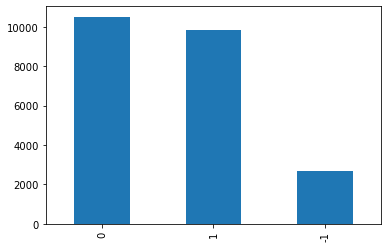

In [113]:
train_data['label'].value_counts().plot(kind='bar')

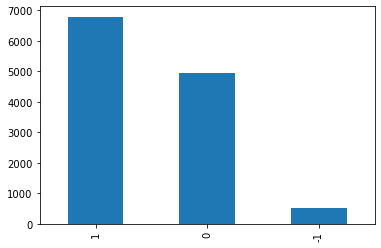

In [114]:
test_data['label'].value_counts().plot(kind='bar')

In [115]:
print(train_data.groupby('label').size().reset_index(name='count'))
print(test_data.groupby('label').size().reset_index(name='count'))

   label  count
0     -1   2666
1      0  10505
2      1   9819
   label  count
0     -1    502
1      0   4929
2      1   6787


## 모델 만들기 위한 전처리 작업

In [116]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

In [117]:
!pip install konlpy

## 토큰화 : 의미있는 단어로 나눠준다.

In [119]:
import konlpy
from konlpy.tag import Okt

okt = Okt()
X_train = []
for sentence in train_data['title']:
  temp_X = [] 
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_train.append(temp_X)

X_test = []
for sentence in test_data['title']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  X_test.append(temp_X)


In [121]:
X_train[:1]

[['전기차', '-', '충전기', '제', '조사', '함께', "'", '상호', '운용', '성', '테스', '티벌', "'"]]

In [145]:
X_test[:1]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        2825, 3376,  214,  138,  265,  314, 1146,    6, 4625]])

## 토큰화한 단어. 컴퓨터 인식 가능하도록 정수 인코딩

In [125]:
from keras.preprocessing.text import Tokenizer
max_words = 35000 
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train) 
X_train = tokenizer.texts_to_sequences(X_train) 
X_test = tokenizer.texts_to_sequences(X_test)

In [129]:
X_test[:3]

[[2825, 3376, 214, 138, 265, 314, 1146, 6, 4625],
 [555,
  516,
  1,
  5203,
  6,
  677,
  107,
  262,
  81,
  436,
  7566,
  3,
  34,
  1983,
  609,
  5578,
  2540,
  43,
  1436],
 [1, 3751, 6, 11, 919, 2, 162, 238, 1685, 1349, 385, 61, 1389, 1081, 2, 335]]

In [126]:
X_train[:3]

[[199, 90, 3123, 165, 646, 774, 2, 4368, 2121, 116, 538, 5170, 2],
 [5, 352, 1, 303, 6310, 51, 338, 775, 254, 5171, 1253, 154, 545, 5],
 [2, 431, 22, 5172, 2, 1294, 1650, 409, 171, 3, 831, 832, 1521, 425]]

## one-hot encoding

In [131]:
import numpy as np
y_train = []
y_test = []
for i in range(len(train_data['label'])):
    if train_data['label'].iloc[i] == 1:
        y_train.append([0, 0, 1]) 
    elif train_data['label'].iloc[i] == 0:
        y_train.append([0, 1, 0]) 
    elif train_data['label'].iloc[i] == -1:
        y_train.append([1, 0, 0]) 
        
for i in range(len(test_data['label'])):
    if test_data['label'].iloc[i] == 1:
        y_test.append([0, 0, 1]) 
    elif test_data['label'].iloc[i] == 0:
        y_test.append([0, 1, 0]) 
    elif test_data['label'].iloc[i] == -1:
        y_test.append([1, 0, 0]) 
        
y_train=np.array(y_train)
y_test=np.array(y_test)

In [134]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1]])

In [135]:
y_train

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

## 모델만들기 & 학습

In [ ]:
## train 데이터 이용해서 모델 만드는거야. 거기에 나중에 테스트 데이터 넣어서 확인 할거다!

In [139]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

max_len = 20 # pad_sequesces이용, 전체 데이터의 길이를 20로 맞춘다
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [140]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
2070/2070 [==============================] - 46s 22ms/step - loss: 0.2849 - accuracy: 0.8970 - val_loss: 0.1075 - val_accuracy: 0.9752
Epoch 2/10
2070/2070 [==============================] - 44s 21ms/step - loss: 0.0705 - accuracy: 0.9826 - val_loss: 0.0751 - val_accuracy: 0.9835
Epoch 3/10
2070/2070 [==============================] - 46s 22ms/step - loss: 0.0456 - accuracy: 0.9886 - val_loss: 0.0721 - val_accuracy: 0.9830
Epoch 4/10
2070/2070 [==============================] - 44s 21ms/step - loss: 0.0361 - accuracy: 0.9915 - val_loss: 0.0859 - val_accuracy: 0.9774
Epoch 5/10
2070/2070 [==============================] - 45s 22ms/step - loss: 0.0279 - accuracy: 0.9934 - val_loss: 0.0723 - val_accuracy: 0.9839
Epoch 6/10
2070/2070 [==============================] - 45s 22ms/step - loss: 0.0238 - accuracy: 0.9947 - val_loss: 0.0649 - val_accuracy: 0.9843
Epoch 7/10
2070/2070 [==============================] - 45s 22ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 0.0763 -

## Optimizer 아담으로 바꾼 애!

In [142]:
model2 = Sequential()
model2.add(Embedding(max_words, 100))
model2.add(LSTM(128))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model2.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
2070/2070 [==============================] - 83s 40ms/step - loss: 0.1978 - accuracy: 0.9287 - val_loss: 0.0496 - val_accuracy: 0.9852
Epoch 2/10
2070/2070 [==============================] - 81s 39ms/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.0401 - val_accuracy: 0.9891
Epoch 3/10
2070/2070 [==============================] - 80s 39ms/step - loss: 0.0130 - accuracy: 0.9966 - val_loss: 0.0428 - val_accuracy: 0.9900
Epoch 4/10
2070/2070 [==============================] - 80s 39ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.0484 - val_accuracy: 0.9883
Epoch 5/10
2070/2070 [==============================] - 83s 40ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0564 - val_accuracy: 0.9883
Epoch 6/10
2070/2070 [==============================] - 81s 39ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0585 - val_accuracy: 0.9896
Epoch 7/10
2070/2070 [==============================] - 81s 39ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0633 -

## 모델 평가

In [143]:
print("\n 테스트 정확도 : {:.2f}%".format(model.evaluate(X_test,y_test)[1]*100))

382/382 [==============================] - 2s 5ms/step - loss: 0.5700 - accuracy: 0.7841

 테스트 정확도 : 78.41%


In [144]:
print("\n 테스트 정확도 : {:.2f}%".format(model2.evaluate(X_test,y_test)[1]*100))

382/382 [==============================] - 2s 5ms/step - loss: 0.0887 - accuracy: 0.9891

 테스트 정확도 : 98.91%


In [39]:
model = Sequential()
model.add(Embedding(max_words, 100))
model.add(LSTM(128))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

Epoch 1/10
540/540 [==============================] - 18s 33ms/step - loss: 0.3645 - accuracy: 0.8687 - val_loss: 0.1752 - val_accuracy: 0.9617
Epoch 2/10
540/540 [==============================] - 18s 32ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.1488 - val_accuracy: 0.9683
Epoch 3/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.1964 - val_accuracy: 0.9550
Epoch 4/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0049 - accuracy: 0.9985 - val_loss: 0.2194 - val_accuracy: 0.9717
Epoch 5/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0053 - accuracy: 0.9989 - val_loss: 0.2083 - val_accuracy: 0.9583
Epoch 6/10
540/540 [==============================] - 17s 32ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.2155 - val_accuracy: 0.9650
Epoch 7/10
540/540 [==============================] - 17s 32ms/step - loss: 8.1597e-04 - accuracy: 0.9996 - val_loss: 0.2350 - val_accur

In [70]:
predict = model.predict(X_test)

In [71]:
import numpy as np
predict_labels = np.argmax(predict, axis=1)
original_labels = np.argmax(y_test, axis=1)

In [72]:
label = ['부정', '중립','긍정']
for i in range(30):
  print("기사제목 : ", test_data_db['title'].iloc[i], "/\t 원래 라벨 : ", label[original_labels[i]], "/\t예측한 라벨 : ", label[predict_labels[i]])

기사제목 :  더벨맘스터치 가맹점포 롯데리아 앞질러1위 우뚝 /	 원래 라벨 :  긍정 /	예측한 라벨 :  중립
기사제목 :  롯데리아도 맘스터치도 패스트푸드점 위생적발 5년간 50 증가 /	 원래 라벨 :  긍정 /	예측한 라벨 :  중립
기사제목 :  맘스터치 도시락 한 달만에 3만개 완판잘 나가는 치킨 프랜차이즈 간편식 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  맘스터치 먹고 뉴이스트 · 옹성우 · 여자친구 보러가자 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  MTM터치 연중기획공연12세계의 음악도시 오스틴 내슈빌 아바나 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  기로에 선 자영업자 그래도 해법은 있다 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  단독 지금도 맥도날드서 벌레·이물질 줄줄줄반년새 21건 포스팅 충격 /	 원래 라벨 :  부정 /	예측한 라벨 :  중립
기사제목 :  엄지족 잡아라패스트푸드도 배달 경쟁 가세 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  더벨강소 외식프랜차이즈 리포트해마로푸드 가격·품질 두마리 토끼 잡 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  맘스터치 펩시 콘서트 입장권 증정 이벤트 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  국내서 1위 쫓는 해마로푸드서비스 맘스터치’해외 사업은 지지부진 /	 원래 라벨 :  긍정 /	예측한 라벨 :  중립
기사제목 :  붐바타 창업박람회 참가제2의 맘스터치 시동건다 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  해마로푸드 붐바타로 제2의 맘스터치 시동건다 /	 원래 라벨 :  중립 /	예측한 라벨 :  중립
기사제목 :  맘스터치 군대스리가 예비군편’ 추가 진행 /	 원래 라벨 :  중립 /	예측한 라벨 :  긍정
기사제목 :  맘스터치 뉴미디어 통해 기부나눔 알리다 /	 원래 라벨 :  긍정 /	예측

In [74]:
label = ['부정', '중립','긍정']
for i in range(30):
  print("기사제목 : ", test_data_db['Title'].iloc[i],  "/\t예측한 라벨 : ", label[predict_labels[i]])

기사제목 :  DB손해보험, 브랜드 사용료 623억 지출 /	예측한 라벨 :  중립
기사제목 :  금융권도 코로나 초비상…3단계 대응 잰걸음(종합) /	예측한 라벨 :  중립
기사제목 :  사회적 거리두기 2단계 연장에…'구인 절벽' 보험사 안도(종합) /	예측한 라벨 :  중립
기사제목 :  코로나 악화땐 시중은행 본점 절반만 출근 /	예측한 라벨 :  중립
기사제목 :  "공채도 못 뽑아…" 코로나 재확산에 보험업계 '구인 절벽' /	예측한 라벨 :  중립
기사제목 :  '개통령'도 물렸다…개물림 사고 최근 5년 간 1만건 넘어(종합) /	예측한 라벨 :  중립
기사제목 :  '개통령'도 물렸다…개물림 사고 평균 진료비 200만원 달해 /	예측한 라벨 :  중립
기사제목 :  DB손보, 주소만 알면 승강기사고배상책임보험 가입 /	예측한 라벨 :  중립
기사제목 :  보험사 오너 2,3세…경영권 승계 준비 '잰걸음'(종합) /	예측한 라벨 :  중립
기사제목 :  보험사 오너 2,3세…경영권 승계 준비 '잰걸음' /	예측한 라벨 :  중립
기사제목 :  대형 생·손보사, '코로나' 악재에도 장사 잘했다(종합) /	예측한 라벨 :  중립
기사제목 :  대형 생·손보사, 코로나19에도 장사 잘했다 /	예측한 라벨 :  중립
기사제목 :  보험사, 2분기 깜짝 실적…"코로나로 손해율 개선" /	예측한 라벨 :  중립
기사제목 :  상반기 금융권 연봉 1위는…정태영 현대카드 부회장 26억원 /	예측한 라벨 :  긍정
기사제목 :  DB손보, 상반기 순익 3494억…전년비 69.4%↑ /	예측한 라벨 :  중립
기사제목 :  [인사]DB손해보험 /	예측한 라벨 :  중립
기사제목 :  반려동물 전용CCTV는? 유플러스펫케어 ‘맘카’로 알려져 /	예측한 라벨 :  중립
기사제목 :  [기자수첩]빅테크, 보험까지 진출…소비자는 환영할까 /	예측한 라벨 :  긍정
기사제목 :  전국 기록적 폭우에 '풍수해보험' 등 피해 접수 잇따라 /	예측한 라벨 :  부정
기사제목 : 